## Exploratory Data Analysis

### Part 2: Flights and Passengers Tables

This EDA has the goal to understand and interpret the patterns and relationships between the flights and passengers tables.

First, let's start with the flights table exploration before moving forward to our task 1.

In [95]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [96]:
# Loading the .csv file to be read in a pandas df
train_flights_subset = pd.read_csv("/Users/rafaelaqueiroz/Mid-Term-Project-I/train_flights_subset.csv", sep = ",")
train_flights_subset.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-13,AA,AA_CODESHARE,AA,4850,PT,N657AE,4850,15096,SYR,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08,B6,B6,B6,168,B6,N633JB,168,13796,OAK,...,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,UA,UA_CODESHARE,UA,5068,OO,N975SW,5068,11027,CKB,...,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-27,WN,WN,WN,388,WN,N968WN,388,10821,BWI,...,430,48.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-05-27,WN,WN,WN,1353,WN,N8575Z,1353,12339,IND,...,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-12,AA,AA_CODESHARE,AA,3696,MQ,N667GB,3696,13930,ORD,...,135,0.0,0.0,36.0,0.0,18.0,NaN,NaN,NaN,NaN
6,2018-06-24,DL,DL,DL,1180,DL,N909DA,1180,11193,CVG,...,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-10-18,WN,WN,WN,2277,WN,N209WN,2277,13296,MHT,...,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-30,AA,AA,AA,711,AA,N818AW,711,12266,IAH,...,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-03-19,AA,AA,AA,151,AA,N868NN,151,14492,RDU,...,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Chequing the number of rows and columns of the train_flights dataset
train_flights_subset.shape

(7000, 42)

In [98]:
# Verifying data types
train_flights_subset.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

From this columns list, we are going to extract only the columns that look relevant to measure and interpret the delays and then we are going to create a new dataframe with them.

In [99]:
# Creating a new dataframe with only the columns about the delays to focus on that for now
train_flights_delays_subset = train_flights_subset[['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
train_flights_delays_subset

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-9.0,-31.0,NaN,NaN,NaN,NaN,NaN
1,-7.0,4.0,NaN,NaN,NaN,NaN,NaN
2,-4.0,-21.0,NaN,NaN,NaN,NaN,NaN
3,61.0,48.0,48.0,0.0,0.0,0.0,0.0
4,-2.0,6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6995,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
6996,-9.0,-38.0,NaN,NaN,NaN,NaN,NaN
6997,-3.0,-16.0,NaN,NaN,NaN,NaN,NaN
6998,-8.0,-25.0,NaN,NaN,NaN,NaN,NaN


In [100]:
# Cheching for missing values as we could see that there are some NaN in our data frame
train_flights_delays_subset.isnull()

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,False,False,True,True,True,True,True
1,False,False,True,True,True,True,True
2,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False
4,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...
6995,False,False,True,True,True,True,True
6996,False,False,True,True,True,True,True
6997,False,False,True,True,True,True,True
6998,False,False,True,True,True,True,True


In [101]:
# Before handling the missing values, let's check the count of those by column
train_flights_delays_subset.isnull().sum()

dep_delay               111
arr_delay               132
carrier_delay          5703
weather_delay          5703
nas_delay              5703
security_delay         5703
late_aircraft_delay    5703
dtype: int64

In [102]:
# Normalizing the dataset with z-score
from scipy.stats import zscore

# Replacing missing values with mean
train_flights_delays_subset.fillna(train_flights_delays_subset.mean(), inplace=True)

# Normalizing data using z-score normalization
train_flights_delays_zscore = train_flights_delays_subset.apply(zscore)
train_flights_delays_zscore

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-0.384215,-0.699374,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
1,-0.343480,-0.017198,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
2,-0.282377,-0.504467,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
3,1.041520,0.840396,1.093682e+00,-2.997590e-01,-7.700349e-01,-0.090995,-1.013955e+00
4,-0.241641,0.021784,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
...,...,...,...,...,...,...,...
6995,-0.262009,-0.192615,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6996,-0.384215,-0.835810,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6997,-0.262009,-0.407013,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16
6998,-0.363847,-0.582430,-1.377000e-16,-9.939913e-17,-1.606111e-16,0.000000,-1.349637e-16


Obs.: Both dep_delay and arr_delay display the difference in minutes between scheduled and actual departure/arrival time. Early departures and arrivals show negative numbers.	

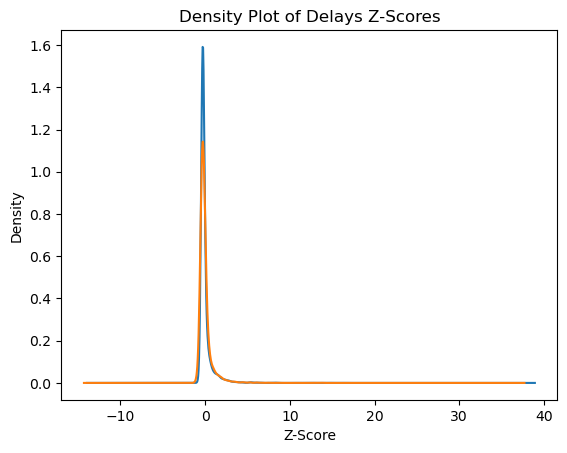

In [103]:
# Ploting a histogram of the the dataset as this is important to see the sample distribution and detect outliers before moving forward with the hypothesis test

# Plotting a density plot for delays columns in the dataset
train_flights_delays_zscore['dep_delay'].plot(kind='density')
train_flights_delays_zscore['arr_delay'].plot(kind='density')
# train_flights_delays_zscore['carrier_delay'].plot(kind='density')
# train_flights_delays_zscore['weather_delay'].plot(kind='density')
# train_flights_delays_zscore['nas_delay'].plot(kind='density')
# train_flights_delays_zscore['security_delay'].plot(kind='density')
# train_flights_delays_zscore['late_aircraft_delay'].plot(kind='density')

# Adding labels and title to the plot
plt.xlabel('Z-Score')
plt.title('Density Plot of Delays Z-Scores')
plt.show()

As we can see, all the plots drawn from the columns follow the same pattern and have a high kurtosis which is an indicator of a dataset that doesn't follow a normal distribution.

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution, and that the **mean** of the delay is 0. Be careful about the outliers.

So, after normalizing the data using z-score, we can test the hypothesis that the delay is from a Normal distribution and that the mean of the delay is 0 as requested on this task. For that, we are going to do a normality test first on the dep_delay and after on the arr_delay by using the Shapiro-Wilk test, and, right after that, we will perform a hypothesis test on the mean.

In [104]:
# Importing scipy.stats
from scipy.stats import shapiro, ttest_1samp

# Performing Shapiro-Wilk test on the dep_delay column
shapiro_test = shapiro(train_flights_delays_zscore['dep_delay'])

# Printing the test statistic and p-value of the dep_delay
print(f"Shapiro-Wilk test statistic is {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk p-value is {shapiro_test.pvalue:.3e}")

# Perform one-sample t-test on the dep_delay column with null hypothesis that the mean is 0
ttest_result = ttest_1samp(train_flights_delays_zscore['arr_delay'], 0, nan_policy='omit')

# Print the test statistic and p-value of dep_delay
print(f"t-test statistic is {ttest_result.statistic:.3f}")
print(f"t-test p-value is {ttest_result.pvalue:.3e}")

Shapiro-Wilk test statistic is 0.333
Shapiro-Wilk p-value is 0.000e+00
t-test statistic is -0.000
t-test p-value is 1.000e+00


/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
# Performing Shapiro-Wilk test on the arr_delay column
shapiro_test = shapiro(train_flights_delays_zscore['arr_delay'])

# Printing the test statistic and p-value of the arr_delay
print(f"Shapiro-Wilk test statistic is {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk p-value is {shapiro_test.pvalue:.3e}")

# Perform one-sample t-test on the arr_delay column with null hypothesis that the mean is 0
ttest_result = ttest_1samp(train_flights_delays_zscore['arr_delay'], 0, nan_policy='omit')

# Print the test statistic and p-value of arr_delay
print(f"t-test statistic is {ttest_result.statistic:.3f}")
print(f"t-test p-value is {ttest_result.pvalue:.3e}")

Shapiro-Wilk test statistic is 0.435
Shapiro-Wilk p-value is 0.000e+00
t-test statistic is -0.000
t-test p-value is 1.000e+00


As we have studied, the Shapiro-Wilk test checks whether a sample comes from a normal distribution or not (the null hypothesis of the test is that the flight delays dataset comes from a normal distribution). According with this theory, if the p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that the data does not come from a normal distribution. 

From our analysis ran in the dep_delay and arr_delay columns, we can infer that both variables represent statistical significance to test our hypothesis by displaying a p-value of the Shapiro-Wilk test equals to 0 which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that the dep_delay and arr_delay variables are not normally distributed.

In addition to that, the t-test performed also pointed out for both variables a similar value for the mean (they might be closer to 0). The one-sample t-test checks whether the mean of a sample is equal to a given value (the null hypothesis of the test is that the mean of the sample is equal to the given value, in our case, it is equal to 0). If the p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that the mean of the sample is different from 0, however as our p-value of both variables is 1, we cannot reject the null hypothesis that the mean of those variables is different or far away from 0.

Now, let's plot the results for both variables.

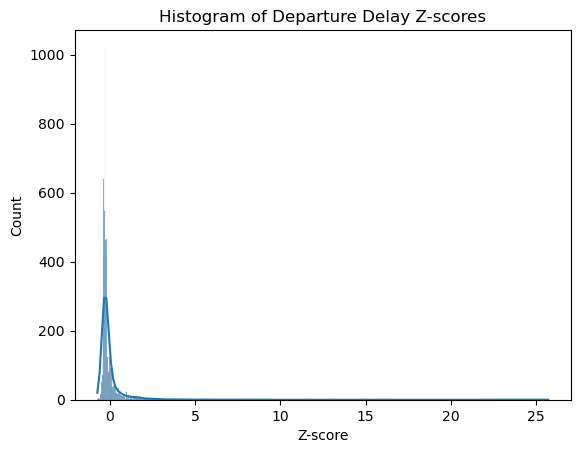

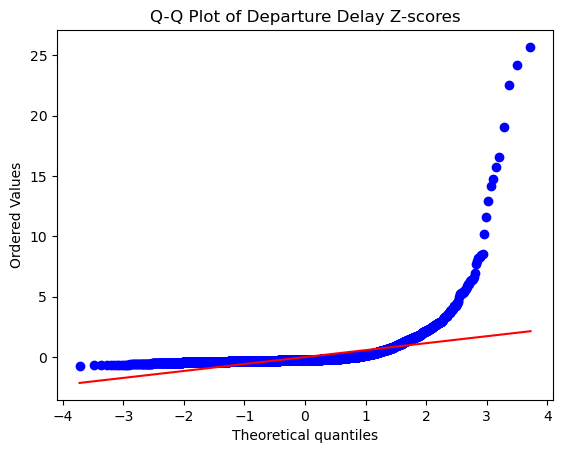

In [106]:
# Creating a histogram of the dep_delay variable
sns.histplot(train_flights_delays_zscore['dep_delay'], kde=True)
plt.xlabel('Z-score')
plt.title('Histogram of Departure Delay Z-scores')
plt.show()

# Creating a Q-Q plot of the dep_delay 
stats.probplot(train_flights_delays_zscore['dep_delay'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Departure Delay Z-scores")
plt.show()

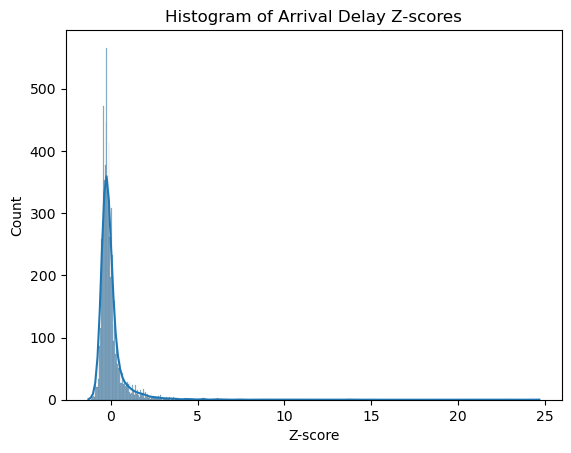

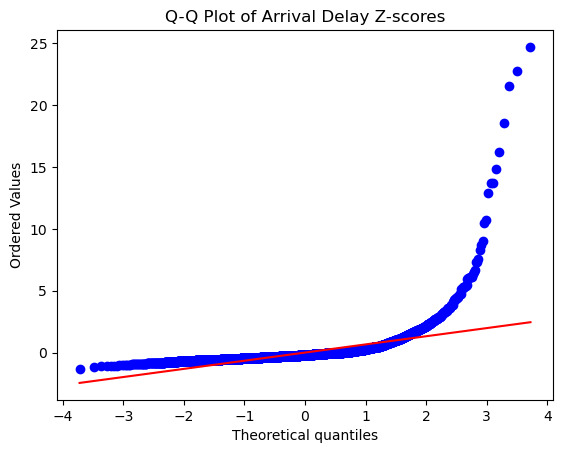

In [107]:
# Creating a histogram of the arr_delay variable
sns.histplot(train_flights_delays_zscore['arr_delay'], kde=True)
plt.xlabel('Z-score')
plt.title('Histogram of Arrival Delay Z-scores')
plt.show()

# Creating a Q-Q plot of the arr_delay 
stats.probplot(train_flights_delays_zscore['arr_delay'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Arrival Delay Z-scores")
plt.show()

Both visualizations of dep_delay and arr_delay suggest that the flight delays are centered around 0 and that the data doesn't follow a normal distribution. Also, the points on the Q-Q plot follow a straight line in the most part and only present a variation at the end of the graph.

#### **Task 2**: Is the average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [108]:
# Coming back to the first dataframe to check the months throught the year
train_flights_subset_monthly_delay = train_flights_subset[['fl_date', 'dep_delay', 'arr_delay']]
train_flights_subset_monthly_delay

,fl_date,dep_delay,arr_delay
0,2019-11-13,-9.0,-31.0
1,2019-12-08,-7.0,4.0
2,2018-08-01,-4.0,-21.0
3,2018-02-27,61.0,48.0
4,2019-05-27,-2.0,6.0
...,...,...,...
6995,2018-03-26,-3.0,-5.0
6996,2019-02-05,-9.0,-38.0
6997,2018-12-26,-3.0,-16.0
6998,2018-11-10,-8.0,-25.0


In [109]:
# For that, we will use the datetime accessor of pandas to extract the month from the date column
train_flights_subset_monthly_delay['month'] = pd.to_datetime(train_flights_subset_monthly_delay['fl_date']).dt.month
train_flights_subset_monthly_delay.tail(10)

/var/folders/zt/gl7xtkgj7238nsqq03s_q7840000gn/T/ipykernel_17245/657756746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flights_subset_monthly_delay['month'] = pd.to_datetime(train_flights_subset_monthly_delay['fl_date']).dt.month


,fl_date,dep_delay,arr_delay,month
6990,2018-05-06,-5.0,-2.0,5
6991,2019-11-05,0.0,-11.0,11
6992,2019-03-22,95.0,104.0,3
6993,2018-01-29,-6.0,-18.0,1
6994,2019-02-11,15.0,-10.0,2
6995,2018-03-26,-3.0,-5.0,3
6996,2019-02-05,-9.0,-38.0,2
6997,2018-12-26,-3.0,-16.0,12
6998,2018-11-10,-8.0,-25.0,11
6999,2018-05-03,-3.0,-12.0,5


In [110]:
# Droping some columns from this df
train_flights_subset_monthly_delay = train_flights_subset_monthly_delay.drop('fl_date', axis = 1)
train_flights_subset_monthly_delay

,dep_delay,arr_delay,month
0,-9.0,-31.0,11
1,-7.0,4.0,12
2,-4.0,-21.0,8
3,61.0,48.0,2
4,-2.0,6.0,5
...,...,...,...
6995,-3.0,-5.0,3
6996,-9.0,-38.0,2
6997,-3.0,-16.0,12
6998,-8.0,-25.0,11


In [111]:
# Chequing for missing values in the month column
train_flights_subset_monthly_delay.isnull().sum

<bound method DataFrame.sum of       dep_delay  arr_delay  month
0         False      False  False
1         False      False  False
2         False      False  False
3         False      False  False
4         False      False  False
...         ...        ...    ...
6995      False      False  False
6996      False      False  False
6997      False      False  False
6998      False      False  False
6999      False      False  False

[7000 rows x 3 columns]>

In [112]:
# Grouping by the month column and calculate the mean delay for each month
train_flights_subset_monthly_delay_mean = train_flights_subset_monthly_delay[['month', 'dep_delay', 'arr_delay']].groupby('month').mean()
train_flights_subset_monthly_delay_mean

,dep_delay,arr_delay
month,,
1,10.732496,5.338739
2,12.266537,7.350877
3,8.475248,2.856436
4,6.302326,1.938849
5,9.031250,4.404514
6,15.681356,12.607204
7,16.208668,11.050000
8,10.584874,6.131092
9,6.616788,0.978022


In [113]:
# Grouping by the month column and calculate the mean delay for each month
train_flights_subset_monthly_delay_median = train_flights_subset_monthly_delay[['month', 'dep_delay', 'arr_delay']].groupby('month').median()
train_flights_subset_monthly_delay_median

,dep_delay,arr_delay
month,,
1,-3.0,-6.0
2,-2.0,-5.0
3,-3.0,-7.0
4,-3.0,-6.0
5,-2.0,-6.0
6,-1.0,-4.0
7,-2.0,-5.0
8,-2.0,-5.0
9,-3.0,-8.0


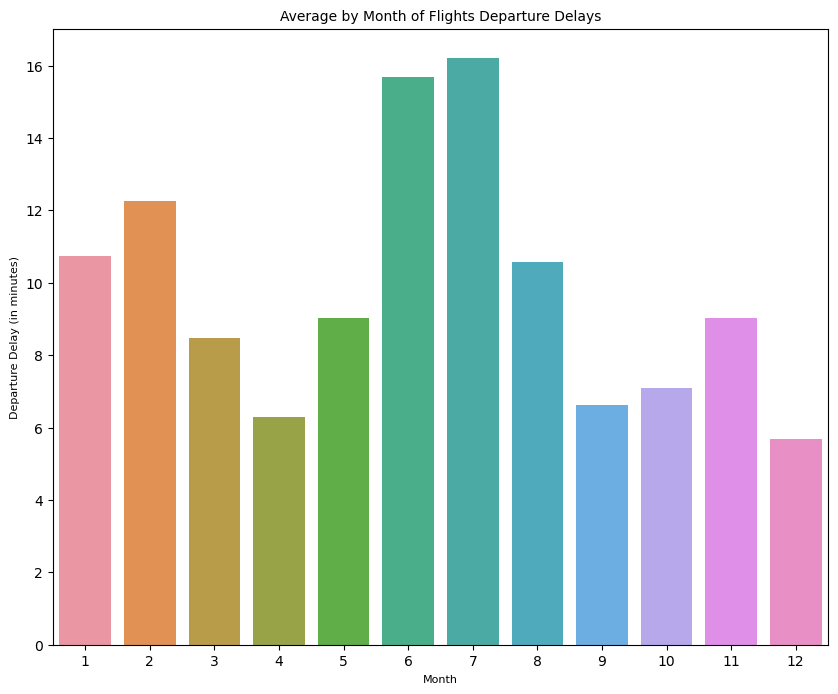

In [114]:
# Plotting the flight delays average to visualize the months with the highest number of delays
fig, ax = plt.subplots(figsize=(10, 8))
x = train_flights_subset_monthly_delay_mean.index
y = train_flights_subset_monthly_delay_mean['dep_delay']
sns.barplot(x=x, y=y, ax=ax)

# setting the titles
ax.set_title("Average by Month of Flights Departure Delays", fontsize=10)
ax.set_xlabel("Month", fontsize=8)
ax.set_ylabel("Departure Delay (in minutes)", fontsize=8)
plt.show()

From those results, it is noted that the monthly average (mean) of the flight departure delays are not the same during the year. Some months, such as July, June, February, January and August have a higher average of flight delays in comparison with the others being July, June and February with the highest number of flights delays. 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [22]:
# train_passengers_subset = pd.read_csv("/Users/rafaelaqueiroz/Mid-Term-Project-I/train_passengers_subset.csv", sep = ",")
# train_passengers_subset.head(10)

In [23]:
# # Chequing the number of rows and columns of the train_passengers dataset
# train_passengers_subset.shape

In [24]:
# # Verifying data types
# train_passengers_subset.dtypes

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?